## Laplace

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [18]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
f = lambda x: np.exp(-(x ** 2) / 2) * sigmoid(20 * x + 4)

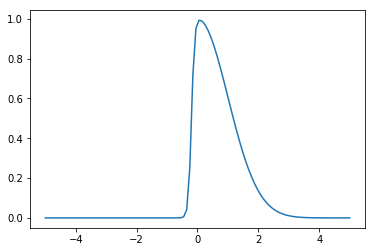

In [40]:
x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.show()

In [30]:
minimization = minimize(lambda x: -f(x), 1)

In [32]:
x0 = minimization['x'][0]

In [78]:
from scipy.misc import derivative
from scipy.stats import norm, multivariate_normal

In [37]:
derivative(lambda y: np.log(f(y)), x0, dx=1e-5)

1.321850181396078e-07

In [107]:
A = -derivative(lambda x: derivative(lambda y: np.log(f(y)), x, dx=1e-5), x0, dx=1e-5)
A

2.5435901583777114

In [68]:
q = lambda x: np.sqrt(A / (2 * np.pi)) * np.exp(-A/2 * (x - x0) ** 2)

Uso la forma funcional, pero como se que de ahí puedo sacar el sigma para usar una $N(x_0, \frac{1}{A}$, lo hago con la implementación normal de la librería scipy

In [70]:
q_lib = norm(x0, 1 / np.sqrt(A))

Grafico ambas normales para validar que son iguales, y la normalización de $p^*$ 

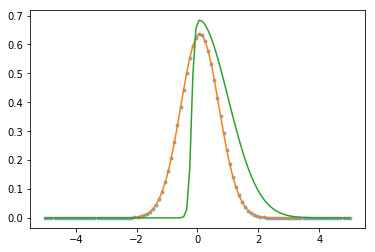

In [73]:
plt.plot(x, q_lib.pdf(x), '.', alpha=0.5)
plt.plot(x, q(x))
plt.plot(x, f(x) / np.sum(f(x)) * np.sum(q(x)))
plt.show()

## KL

In [154]:
weights = [0.3, 0.7]
cov = [[0.5, 0], [0, 0.5]]
p = lambda x: weights[0] * multivariate_normal([1, 2], cov).pdf(x) + weights[1] * multivariate_normal([3, 4], cov).pdf(x)

In [176]:
x = np.linspace(-1, 6, 100)

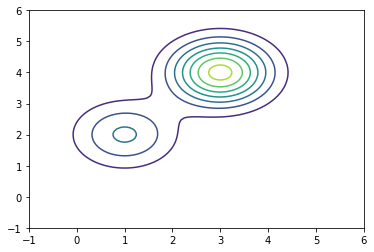

In [177]:
X, Y = np.meshgrid(x, x)
matrix = np.column_stack((X.reshape(10000, 1), Y.reshape(10000, 1)))
plt.contour(X, Y, p(matrix).reshape(100, 100))
plt.show()

In [256]:
q = lambda mus, x: multivariate_normal(mus, cov).pdf(x)

In [186]:
rev = lambda mus, x: q(mus, x) * np.log(q(mus, x) / p(x))
fwd = lambda mus, x: p(x) * np.log(p(x) / q(mus, x))

In [260]:
from scipy.integrate import dblquad as integrate

In [270]:
minimization_rev = minimize(lambda mus: integrate(lambda x, y: rev(mus, [x, y]), -4, 4, -4, 4)[0], [0, 0])

In [271]:
mus_min = minimization_rev['x']
mus_min

array([1.20033549, 2.2088087 ])

In [272]:
q_candidate = lambda x: q(mus_min, x)

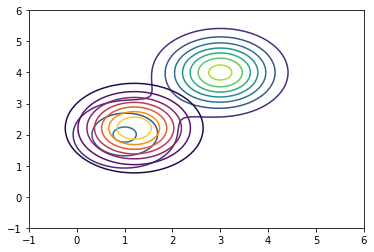

In [273]:
X, Y = np.meshgrid(x, x)
matrix = np.column_stack((X.reshape(10000, 1), Y.reshape(10000, 1)))
plt.contour(X, Y, p(matrix).reshape(100, 100))
plt.contour(X, Y, q_candidate(matrix).reshape(100, 100), cmap=plt.cm.inferno)
plt.show()

In [266]:
minimization_fwd = minimize(lambda mus: integrate(lambda x, y: fwd(mus, [x, y]), -4, 4, -4, 4)[0], [0, 0])

In [267]:
mus2_min = minimization_fwd['x']
mus2_min

array([1.97884331, 2.74217348])

In [268]:
q_candidate_fwd = lambda x: q(mus2_min, x)

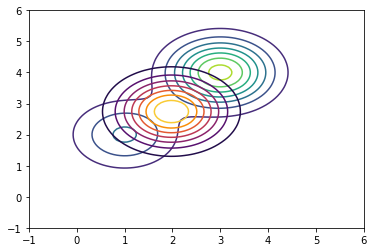

In [269]:
X, Y = np.meshgrid(x, x)
matrix = np.column_stack((X.reshape(10000, 1), Y.reshape(10000, 1)))
plt.contour(X, Y, p(matrix).reshape(100, 100))
plt.contour(X, Y, q_candidate_fwd(matrix).reshape(100, 100), cmap=plt.cm.inferno)
plt.show()

Como se observa tiene el comportamiento esperado para ambos casos, se ve en backwards o reverse que es mas propenso a la moda de una de las dos, y que en forwards promedia

No alcanzo a hacer ni comentar más, clases a las 3:30 :(